In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from scipy.optimize import curve_fit

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [54]:
DATA_FOLDER = "20210816_RTStageTesting_MW_MembraneSample"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDERPATH)

OSCILLOSCOPE_FOLDER = "cwODMR_Oscilloscope"
OSCILLOSCOPE_FOLDERPATH = sio.get_qudiamond_folderpath(os.path.join(DATA_FOLDER, OSCILLOSCOPE_FOLDER))

In [37]:
df = pd.read_csv(os.path.join(DATA_FOLDERPATH, "20210818_NetworkAnalysis_after_correction_2.dat"), sep=";", skiprows=27, usecols=[0, 1])
df.columns = ["Frequency", "Power"]

df2 =  pd.read_csv(os.path.join(DATA_FOLDERPATH, "20210818_NetworkAnalysis.csv"))

src.io :: INFO :: Saving 'NetworkAnalysis_original_and_corrected' to 'C:/Nextcloud\Data_Analysis\20210816_RTStageTesting_MW_MembraneSample'


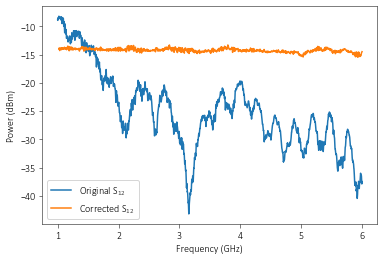

In [53]:
fig, ax = plt.subplots()

ax.plot(df2.Frequency/1e9, df2.Power, label="Original $S_{12}$")

a = 170
ax.plot(df.Frequency[a:]/1e9, df.Power[a:], label="Corrected $S_{12}$")

ax.legend()
ax.set_ylabel("Power (dBm)")
ax.set_xlabel("Frequency (GHz)")

sio.save_figures("NetworkAnalysis_original_and_corrected", folder=DATA_FOLDER)

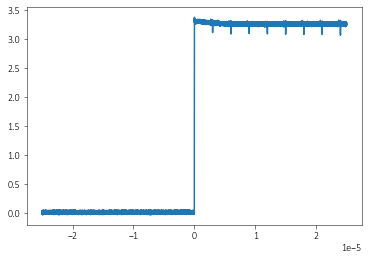

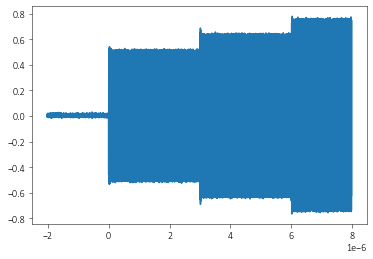

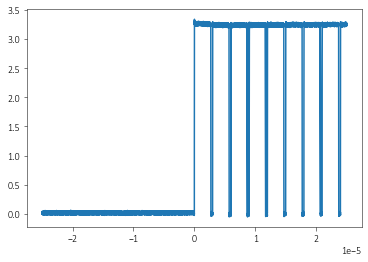

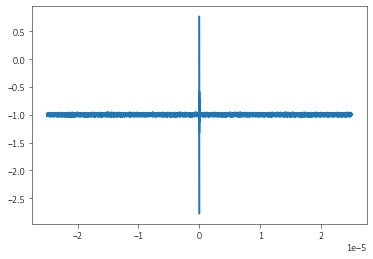

In [60]:
for file in os.listdir(OSCILLOSCOPE_FOLDERPATH):
    dfo = pd.read_csv(os.path.join(OSCILLOSCOPE_FOLDERPATH, file), skiprows=4, usecols=[0, 1])

    fig, ax = plt.subplots()
    ax.plot(dfo.Time, dfo.Ampl, label="Original $S_{12}$")

In [59]:
    print(file)

Laser_dch0_oscilloscope_C1.trc
Quadrature_ach1_oscilloscope_C3.trc
Readout_dch1_oscilloscope_C2.trc
Switch_dch2_oscilloscope_C3.trc
